In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
'fractal_dimension_se', 'radius_worst', 'texture_worst',
'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst',
'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

In [4]:
df=pd.read_csv(url,names=names)
print(df.shape) #569*33

print(df.head())

print(df.describe())

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

In [5]:
#id column has no use for machine learning
df.drop(["id"],1,inplace=True) #id cloumn'u silme

#drop the column with all missing values(na,NAN,NaN)
df=df.dropna(axis="columns")

B    357
M    212
Name: diagnosis, dtype: int64


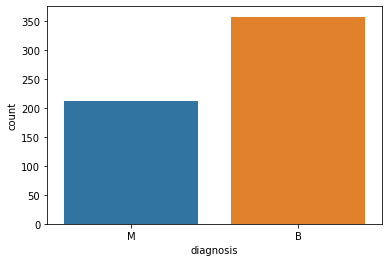

In [6]:
#visualize diagnosis counts
sns.countplot(df["diagnosis"],label="Count")
print(df["diagnosis"].value_counts())

In [7]:
#transform/encode the column diagnosis
#change all "M" to 1 and all "B" to 0 in the diagnosis col
dictionary={"M":1,"B":0}
df.diagnosis=[dictionary[item] for item in df.diagnosis]
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [8]:
#get the correlation of the columns
print(df.corr())

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

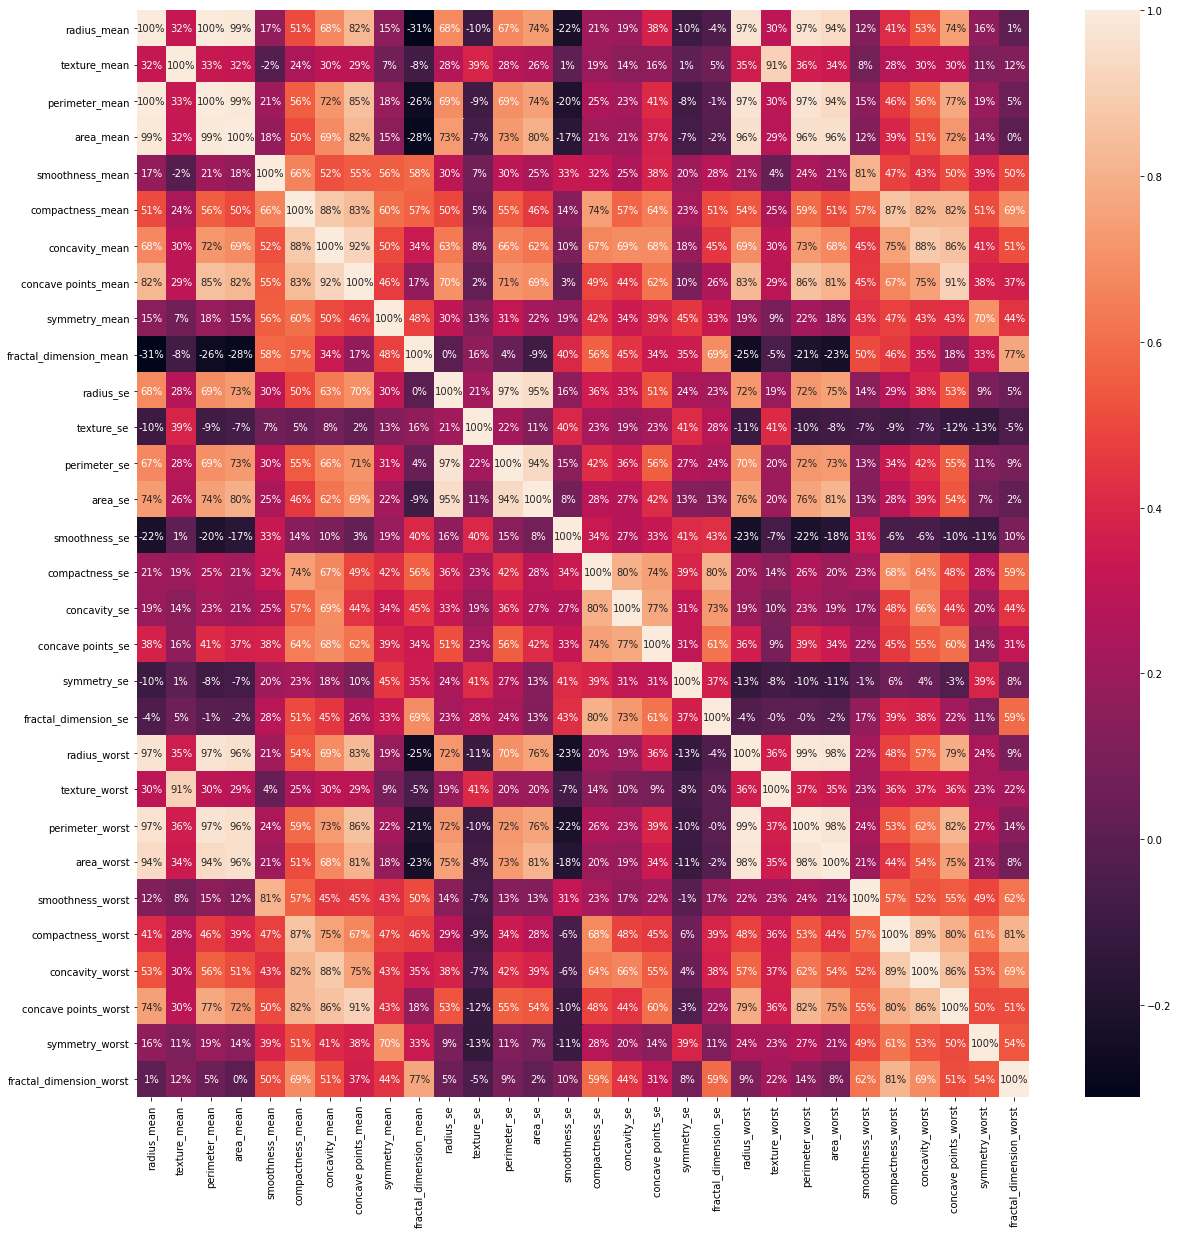

In [9]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,fmt=".0%")